In [1]:
import pickle

import matplotlib.pyplot as plt
# import numpy a
import numpy as np
import pandas as pd

with open("spikes_datar.pkl", 'rb') as f:
    data = pickle.load(f)
keys_to_delete = []
for k, v in data.items():
    if len(v) == 0:
        keys_to_delete.append(k)
for k in keys_to_delete:
    del data[k]
# data

In [2]:
import re

dc_m = re.compile(".*_DC_(-?[0-9]+).*")
model_m = re.compile("(.*)_DC_-?[0-9]+(.*)")
d_arr = {'model': [], 'id': [], 's': []}
for m in data.keys():
    for id in data[m].keys():
        d_arr['model'].append(m)
        d_arr['id'].append(id)
        d_arr['s'].append(data[m][id])
df = pd.DataFrame(d_arr)
df = df[df['model'].str.contains('DC')]
df['DC'] = df['model'].apply(lambda x: int(dc_m.match(x).group(1)))
df['model'] = df['model'].apply(lambda x: model_m.match(x).group(1) + model_m.match(x).group(2))
df = df[df['s'].apply(lambda x: x.size > 5)]
df['s'] = df['s'].apply(lambda x: x[1:] - x[:-1])
df['cv'] = df['s'].apply(lambda x: x.std() / x.mean())
df

,model,id,s,DC,cv
0,Rat_L5b_PC_2_Hay_noNMDA_factor_1,ID_46_411911_Rat_L5b_PC_2_Hay_noNMDA_factor_1_...,"[8, 58, 28, 46, 32, 22, 15, 111, 102, 25, 14, ...",-20,0.754995
1,Rat_L5b_PC_2_Hay_noNMDA_factor_1,ID_79_430323_Rat_L5b_PC_2_Hay_noNMDA_factor_1_...,"[6, 8, 50, 12, 12, 151, 74, 15, 77, 15, 120, 8...",-20,0.599677
2,Rat_L5b_PC_2_Hay_noNMDA_factor_1,ID_74_556493_Rat_L5b_PC_2_Hay_noNMDA_factor_1_...,"[8, 12, 213, 16, 19, 11, 65, 10, 97, 92, 66, 6...",-20,1.120872
3,Rat_L5b_PC_2_Hay_noNMDA_factor_1,ID_34_556877_Rat_L5b_PC_2_Hay_noNMDA_factor_1_...,"[6, 7, 47, 12, 12, 100, 14, 145, 16, 90, 13, 1...",-20,0.692943
4,Rat_L5b_PC_2_Hay_noNMDA_factor_1,ID_51_16144_Rat_L5b_PC_2_Hay_noNMDA_factor_1_D...,"[6, 10, 26, 54, 10, 100, 9, 109, 89, 22, 87, 1...",-20,0.791451
...,...,...,...,...,...
7048,Rat_L5b_PC_2_Hay_factor_0-2,ID_11_137787_Rat_L5b_PC_2_Hay_factor_0-2_DC_-110,"[7, 8, 63, 8, 1714, 7, 8, 13, 37, 12, 197, 28,...",-110,2.190657
7049,Rat_L5b_PC_2_Hay_factor_0-2,ID_78_177434_Rat_L5b_PC_2_Hay_factor_0-2_DC_-110,"[12, 45, 8, 7, 13, 50, 9, 381, 7, 243, 9, 166,...",-110,1.823678
7050,Rat_L5b_PC_2_Hay_factor_0-2,ID_49_86313_Rat_L5b_PC_2_Hay_factor_0-2_DC_-110,"[8, 7, 679, 8, 8, 2991, 78, 6817, 8, 2318, 7, ...",-110,2.199930
7051,Rat_L5b_PC_2_Hay_factor_0-2,ID_55_316623_Rat_L5b_PC_2_Hay_factor_0-2_DC_-110,"[60, 158, 54, 111, 29, 219, 814, 16, 335, 354,...",-110,1.668815


<AxesSubplot: xlabel='DC', ylabel='cv'>

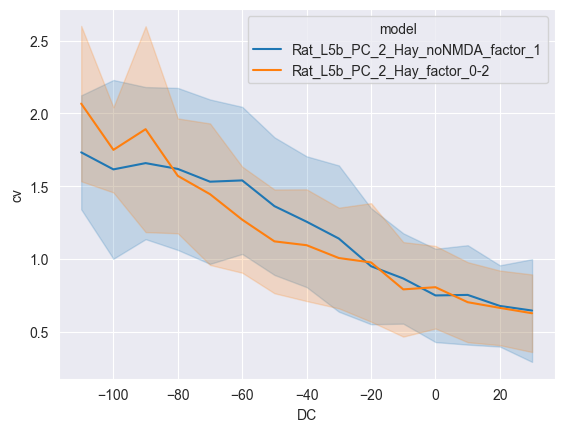

In [3]:
import seaborn as sns

sns.lineplot(df, x='DC', y='cv', hue='model', errorbar='sd')

0.0
6000.0


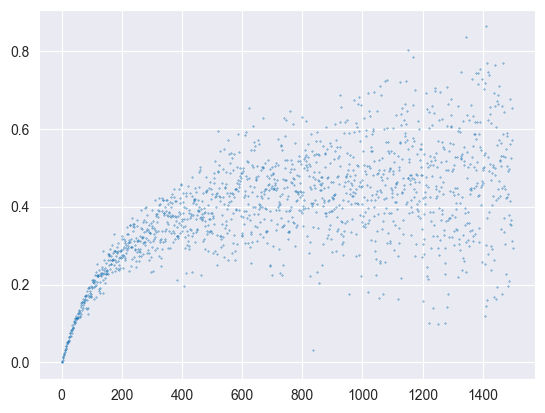

1410


In [4]:
import matplotlib.pyplot as plt
size=6000
jumps=100
a_regular = np.zeros((size,))+jumps
print(a_regular.std() / a_regular.mean())

genereate_less_regular = lambda x: a_regular+np.random.randint(0,x,size=size) if x>0 else a_regular
c_cv = lambda x:x.std()/x.mean()
cv_arr = []
max_length=0
r_c_arr=[]
r_arr=[]
x=list(range(size//4))
for i in x:
    r= genereate_less_regular(i)

    r_a=np.array(r).cumsum()
    # r_a=r_a
    mask=size-r_a
    mask[mask<0]=None
    r = r[:np.nanargmin(np.abs(mask))]
    max_length=max(max_length,r_a[r.shape[0]])
    r_c_arr.append(r_a[:np.nanargmin(np.abs(mask))])

    r_arr.append(r)
    # print(r.sum())
    cv_arr.append(c_cv(r))
print(max_length)
plt.scatter(x,cv_arr,s=0.1)
plt.show()
print(np.argmin(np.abs(np.array(cv_arr)-1)))

In [5]:
r= genereate_less_regular(3000)
r_a=np.array(r).cumsum()
# r_a=r_a-r_a[0]
r

array([2915., 1393.,  990., ..., 2348.,  340., 1976.])

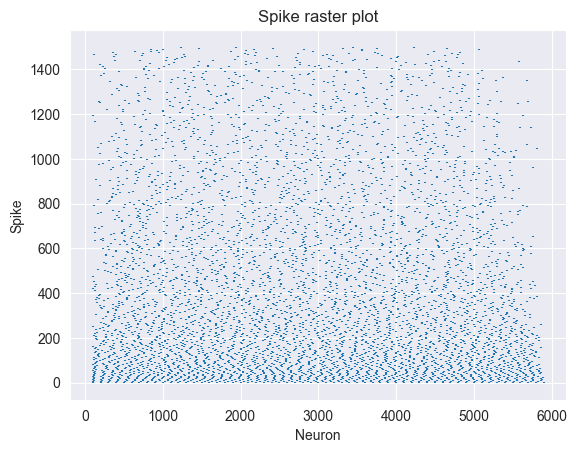

In [9]:
spike_arr=[]
spike_np = r_c_arr
plt.eventplot(spike_np)#, color=colorCodes, linelengths=lineSize)
plt.title('Spike raster plot')
plt.xlabel('Neuron')
plt.ylabel('Spike')
plt.show()

In [8]:
spike_arr=[]
for r in r_arr:
    z=np.zeros((int(max_length+1),))
    r= np.cumsum(r).astype(int)
    z[r]=1
    spike_arr.append(z)

In [ ]:
def rasterplot(isi_data):
    fig, ax = plt.subplots()
    # for i in range(len(spike_data)):
    #     ax.scatter(i)
    for i,d in enumerate(isi_data):
        # i=
        print(d)
        ax.scatter(i*np.ones_like(d),d)
        break
    # ax.set_ylim([-.5, len(spike_data) - .5])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron index')
    plt.show()

rasterplot(r_c_arr)

In [ ]:
import entropy as ent
from entropy.CTW.CTW import UnboundProbabilityException
from tqdm import tqdm


r_ent=[]
for i,z in enumerate(spike_arr):

    print(i)
    b = ent.CTW()
    tqdm(b.insert_pattern(z.astype(int).tolist()), disable=True)
    r_ent.append(b.get_entropy(max_length))
plt.plot(x,r_ent)
plt.show()